In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./dm2021tree.csv')
df

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,M,Family,Small,C1
1,2,M,Sports,Medium,C0
2,3,M,Sports,Medium,C0
3,4,M,Sports,Large,C0
4,5,M,Sports,Extra Large,C0
5,6,M,Sports,Extra Large,C0
6,7,F,Sports,Small,C0
7,8,F,Sports,Small,C0
8,9,F,Sports,Medium,C0
9,10,F,Luxury,Large,C0


In [4]:
CustomerData = df[['Gender', 'Car Type','Shirt Size']]


In [5]:
CustomerData['Gender'] = (CustomerData['Gender'] == 'M').astype('int')
label1 = CustomerData['Car Type'].unique().tolist()
CustomerData['Car Type'] = CustomerData['Car Type'].apply(lambda n: label1.index(n))
label2 = CustomerData['Shirt Size'].unique().tolist()
CustomerData['Shirt Size'] = CustomerData['Shirt Size'].apply(lambda n: label2.index(n))


C:\Users\USER\AppData\Local\Temp/ipykernel_8572/2570988120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerData['Gender'] = (CustomerData['Gender'] == 'M').astype('int')
C:\Users\USER\AppData\Local\Temp/ipykernel_8572/2570988120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerData['Car Type'] = CustomerData['Car Type'].apply(lambda n: label1.index(n))
C:\Users\USER\AppData\Local\Temp/ipykernel_8572/2570988120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [6]:
CustomerData = np.array(CustomerData)
CustomerData[:5]

array([[1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 3]], dtype=int64)

In [7]:
CustomerTarget = df['Class']
CustomerTarget = np.array(CustomerTarget)
CustomerTarget[:5]

array(['C1', 'C0', 'C0', 'C0', 'C0'], dtype=object)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
myDT = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
myDT

DecisionTreeClassifier(max_depth=3)

In [10]:
myDT.fit(CustomerData, CustomerTarget)

DecisionTreeClassifier(max_depth=3)

In [11]:
y_pred = myDT.predict(CustomerData)
y_pred

array(['C1', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C1',
       'C1', 'C1', 'C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0'], dtype=object)

In [12]:
from sklearn import metrics

In [13]:
acc = metrics.accuracy_score(CustomerTarget, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.95


In [14]:
mycm = metrics.confusion_matrix(CustomerTarget, y_pred)
print('Confusion Matrix: \n', mycm)

Confusion Matrix: 
 [[10  0]
 [ 1  9]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


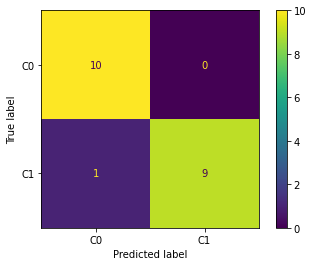

In [20]:
metrics.plot_confusion_matrix(myDT,CustomerData, CustomerTarget)

In [16]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'X[1] <= 0.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'X[1] <= 1.5\ngini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

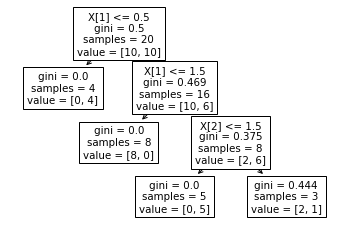

In [17]:
plot_tree(myDT)

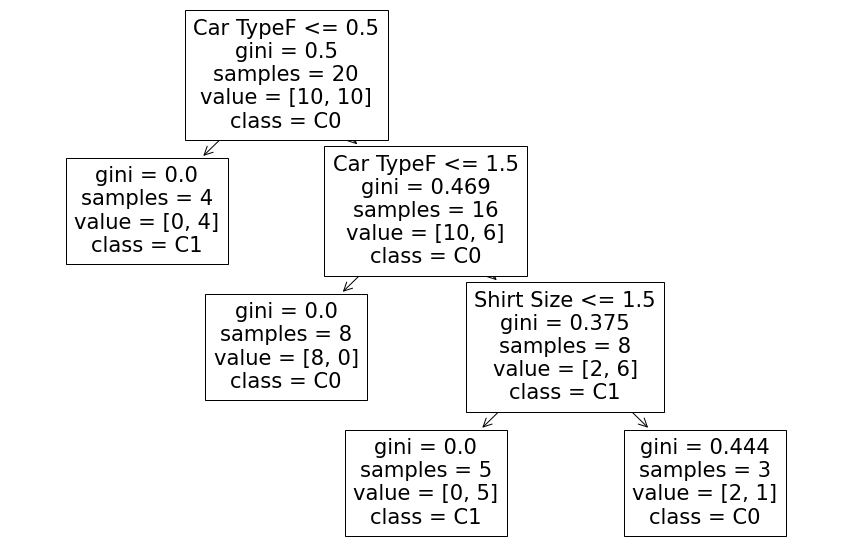

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
A=['C0', 'C1']
F=['Gender','Car TypeF','Shirt Size']
plot_tree(myDT, feature_names=F, class_names=A)

plt.show()